# SFH of UV red galaxies
In `uv_red.ipynb` I examined the SEDs and properties of simulated galaxies that are intrinsically very UV red (FUV - NUV > 2.5). In this notebook, I will examine their SFHs and answer the following questions: 
1. Do UV red galaxies have different SFHs than quiescent galaxies with comparable $M_*$ and ${\rm SFR}$? 
2. Do the UV red/quiescent galaxies in SIMBA differ from the UV red/quiescent galaxies in TNG or EAGLE? 

In [1]:
import os 
import sys 
import h5py 
import numpy as np 
# -- galpopfm --
from galpopfm import dust_infer as dustInfer
from galpopfm import measure_obs as measureObs

In [2]:
# -- plotting -- 
import matplotlib as mpl
import matplotlib.pyplot as plt 
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False

In [3]:
t_sfh_low, t_sfh_high = np.loadtxt('/Users/chahah/data/galpopfm/sed/simba/t_sfh.txt', unpack=True, delimiter=',', usecols=[0, 1])

In [4]:
sfh_simba = h5py.File('/Users/chahah/data/galpopfm/sed/simba/simba.sfh.m100n1024_s151_z0.00.hdf5', 'r')
sed_simba = dustInfer._read_sed('simba') 

In [5]:
sfr0_simba = sfh_simba['SFR'][...] == 0.
logsfr_simba = np.log10(sfh_simba['SFR'][...])
logsfr_simba[sfr0_simba] = -6

FUV_simba = measureObs.AbsMag_sed(sed_simba['wave'], sed_simba['sed_noneb'], band='galex_fuv') 
NUV_simba = measureObs.AbsMag_sed(sed_simba['wave'], sed_simba['sed_noneb'], band='galex_nuv')
R_simba = measureObs.AbsMag_sed(sed_simba['wave'], sed_simba['sed_noneb'], band='r_sdss')

In [6]:
uv_red = (FUV_simba - NUV_simba) > 2.5
print('%i UV red galaxies in SIMBA' % np.sum(uv_red))

8751 UV red galaxies in SIMBA


(-6.2, 2.0)

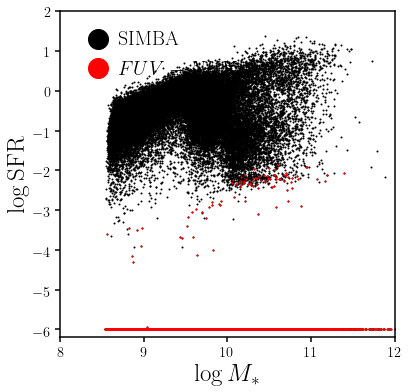

In [7]:
fig = plt.figure(figsize=(6,6))
sub = fig.add_subplot(111)
sub.scatter(sed_simba['logmstar'], logsfr_simba, c='k', s=1, label='SIMBA')
sub.scatter(sed_simba['logmstar'][uv_red], logsfr_simba[uv_red], c='r', s=1, label='$FUV-NUV > 2.5$')
sub.legend(loc='upper left', markerscale=20, handletextpad=0., fontsize=20)
sub.set_xlabel('$\log M_*$', fontsize=25)
sub.set_xlim(8, 12)
sub.set_ylabel(r'$\log {\rm SFR}$', fontsize=25)
sub.set_ylim(-6.2, 2)

In [8]:
lum_sf = (R_simba < -21.5) & (logsfr_simba > 0.5)
lum_uv_red = (R_simba < -21.5) & uv_red
lum_q_cont = (R_simba < -21.5) & (logsfr_simba < -1) & ~uv_red

(-6.2, 4.0)

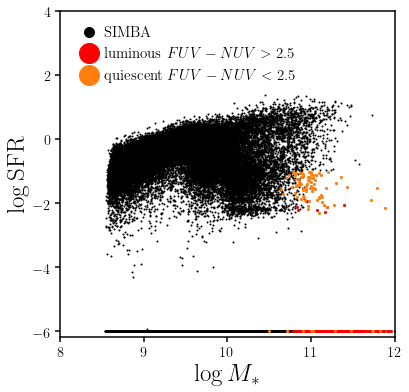

In [9]:
fig = plt.figure(figsize=(6,6))
sub = fig.add_subplot(111)
sub.scatter(sed_simba['logmstar'], logsfr_simba, c='k', s=1, label='SIMBA')
sub.scatter(sed_simba['logmstar'][lum_uv_red], logsfr_simba[lum_uv_red], c='r', s=4, label='luminous $FUV-NUV > 2.5$')
sub.scatter(sed_simba['logmstar'][lum_q_cont], logsfr_simba[lum_q_cont], c='C1', s=4, label='quiescent $FUV-NUV < 2.5$')
sub.legend(loc='upper left', markerscale=10, handletextpad=0., fontsize=15)
sub.set_xlabel('$\log M_*$', fontsize=25)
sub.set_xlim(8, 12)
sub.set_ylabel(r'$\log {\rm SFR}$', fontsize=25)
sub.set_ylim(-6.2, 4)

In [10]:
sfh_t_simba = np.sum(sfh_simba['StarMassFormed_in_metal_age_Bin'], axis=1)

In [11]:
sfh_t_lum_uv_red = np.quantile(sfh_t_simba[lum_uv_red,:], [0.16, 0.50, 0.84], axis=0)
sfh_t_lum_q_cont = np.quantile(sfh_t_simba[lum_q_cont,:], [0.16, 0.50, 0.84], axis=0)

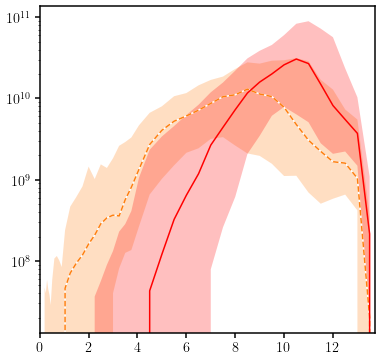

In [12]:
fig = plt.figure(figsize=(6,6))
sub = fig.add_subplot(111)

sub.fill_between(0.5 * (t_sfh_low + t_sfh_high), sfh_t_lum_q_cont[0], sfh_t_lum_q_cont[2], color='C1', linewidth=0, alpha=0.25)
sub.plot(0.5 * (t_sfh_low + t_sfh_high), sfh_t_lum_q_cont[1], c='white', linestyle='-')
sub.plot(0.5 * (t_sfh_low + t_sfh_high), sfh_t_lum_q_cont[1], c='C1', linestyle='--')

sub.fill_between(0.5 * (t_sfh_low + t_sfh_high), sfh_t_lum_uv_red[0], sfh_t_lum_uv_red[2], color='r', linewidth=0, alpha=0.25)
sub.plot(0.5 * (t_sfh_low + t_sfh_high), sfh_t_lum_uv_red[1], c='r')
sub.set_xlim(0, 13.7)
sub.set_yscale('log')

In [13]:
sfr_t_simba = np.sum(sfh_simba['StarMassFormed_in_metal_age_Bin'], axis=1) / (t_sfh_high - t_sfh_low) / 1e9

sfr_t_lum_sf = np.quantile(sfr_t_simba[lum_sf,:], [0.16, 0.50, 0.84], axis=0)
sfr_t_lum_uv_red = np.quantile(sfr_t_simba[lum_uv_red,:], [0.16, 0.50, 0.84], axis=0)
sfr_t_lum_q_cont = np.quantile(sfr_t_simba[lum_q_cont,:], [0.16, 0.50, 0.84], axis=0)

Text(0, 0.5, 'SFR [$M_\\odot/yr$]')

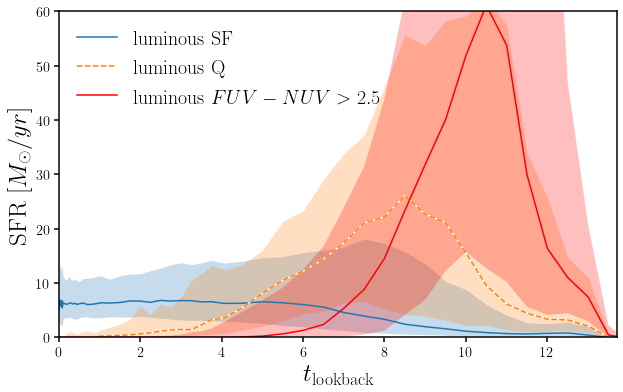

In [27]:
fig = plt.figure(figsize=(10,6))
sub = fig.add_subplot(111)

sub.fill_between(0.5 * (t_sfh_low + t_sfh_high), sfr_t_lum_sf[0], sfr_t_lum_sf[2], color='C0', linewidth=0, alpha=0.25)
sub.plot(0.5 * (t_sfh_low + t_sfh_high), sfr_t_lum_sf[1], c='C0', label='luminous SF')

sub.fill_between(0.5 * (t_sfh_low + t_sfh_high), sfr_t_lum_q_cont[0], sfr_t_lum_q_cont[2], color='C1', linewidth=0, alpha=0.25)
sub.plot(0.5 * (t_sfh_low + t_sfh_high), sfr_t_lum_q_cont[1], c='white', linestyle='-')
sub.plot(0.5 * (t_sfh_low + t_sfh_high), sfr_t_lum_q_cont[1], c='C1', linestyle='--', label='luminous Q')

sub.fill_between(0.5 * (t_sfh_low + t_sfh_high), sfr_t_lum_uv_red[0], sfr_t_lum_uv_red[2], color='r', linewidth=0, alpha=0.25)
sub.plot(0.5 * (t_sfh_low + t_sfh_high), sfr_t_lum_uv_red[1], c='r', label='luminous $FUV - NUV > 2.5$')
sub.legend(loc='upper left', fontsize=20)
sub.set_xlim(0, 13.7)
sub.set_xlabel(r'$t_{\rm lookback}$', fontsize=25)
sub.set_ylim(0., 60.)
sub.set_ylabel(r'SFR [$M_\odot/yr$]', fontsize=25)

Now we can answer the question
1. Do UV red galaxies have different SFHs than quiescent galaxies with comparable $M_*$ and ${\rm SFR}$? 

**Yes, UV red galaxies do not have star formation for over 2 Gyrs!**

Lets see if this is also the case for TNG and EAGLE

In [15]:
sed_tng = dustInfer._read_sed('tng') 
sfh_tng = h5py.File('/Users/chahah/data/galpopfm/sed/tng/IQ_TNG_SFRHs-corrected.hdf5', 'r')

In [16]:
sfr0_tng = sed_tng['logsfr.inst'] == -999
logsfr_tng = sed_tng['logsfr.inst']
logsfr_tng[sfr0_tng] = -6

FUV_tng = measureObs.AbsMag_sed(sed_tng['wave'], sed_tng['sed_noneb'], band='galex_fuv') 
NUV_tng = measureObs.AbsMag_sed(sed_tng['wave'], sed_tng['sed_noneb'], band='galex_nuv')
R_tng = measureObs.AbsMag_sed(sed_tng['wave'], sed_tng['sed_noneb'], band='r_sdss')

In [17]:
uv_red_tng = (FUV_tng - NUV_tng) > 2.5
print('%i UV red galaxies in TNG' % np.sum(uv_red_tng))

13107 UV red galaxies in TNG


(-6.2, 4.0)

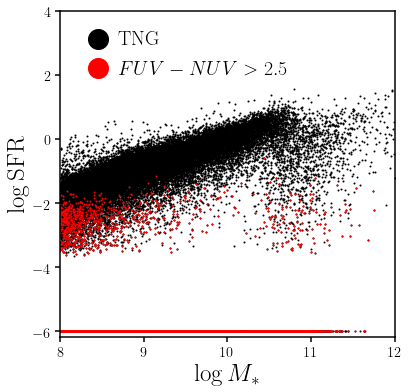

In [18]:
fig = plt.figure(figsize=(6,6))
sub = fig.add_subplot(111)
sub.scatter(sed_tng['logmstar'], logsfr_tng, c='k', s=1, label='TNG')
sub.scatter(sed_tng['logmstar'][uv_red_tng], logsfr_tng[uv_red_tng], c='r', s=1, label='$FUV-NUV > 2.5$')
sub.legend(loc='upper left', markerscale=20, handletextpad=0., fontsize=20)
sub.set_xlabel('$\log M_*$', fontsize=25)
sub.set_xlim(8, 12)
sub.set_ylabel(r'$\log {\rm SFR}$', fontsize=25)
sub.set_ylim(-6.2, 4)

In [19]:
lum_sf_tng = (R_tng < -21.5) & (logsfr_tng > 0)
lum_uv_red_tng = (R_tng < -21.5) & uv_red_tng
lum_q_cont_tng = (R_tng < -21.5) & (logsfr_tng < -1) & ~uv_red_tng

(-6.2, 4.0)

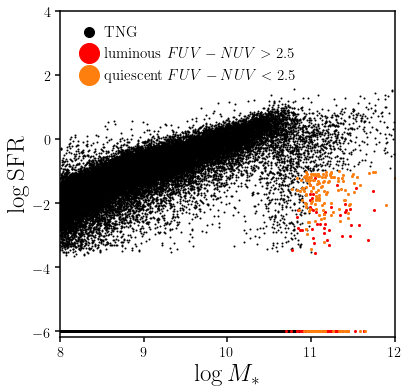

In [20]:
fig = plt.figure(figsize=(6,6))
sub = fig.add_subplot(111)
sub.scatter(sed_tng['logmstar'], logsfr_tng, c='k', s=1, label='TNG')
sub.scatter(sed_tng['logmstar'][lum_uv_red_tng], logsfr_tng[lum_uv_red_tng], c='r', s=4, label='luminous $FUV-NUV > 2.5$')
sub.scatter(sed_tng['logmstar'][lum_q_cont_tng], logsfr_tng[lum_q_cont_tng], c='C1', s=4, label='quiescent $FUV-NUV < 2.5$')
sub.legend(loc='upper left', markerscale=10, handletextpad=0., fontsize=15)
sub.set_xlabel('$\log M_*$', fontsize=25)

sub.set_xlim(8, 12)
sub.set_ylabel(r'$\log {\rm SFR}$', fontsize=25)
sub.set_ylim(-6.2, 4)

In [21]:
sfh_t_tng = np.sum(sfh_tng['SFRH'], axis=2) * (t_sfh_high - t_sfh_low) * 1e9

In [22]:
sfh_t_lum_uv_red_tng = np.quantile(sfh_t_tng[lum_uv_red_tng,:], [0.16, 0.50, 0.84], axis=0)
sfh_t_lum_q_cont_tng = np.quantile(sfh_t_tng[lum_q_cont_tng,:], [0.16, 0.50, 0.84], axis=0)

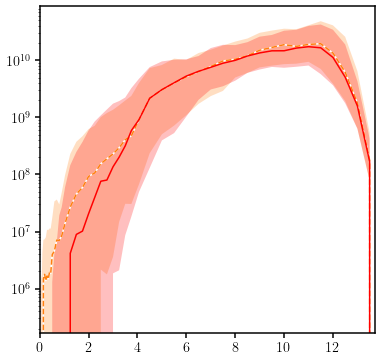

In [23]:
fig = plt.figure(figsize=(6,6))
sub = fig.add_subplot(111)

sub.fill_between(0.5 * (t_sfh_low + t_sfh_high), sfh_t_lum_q_cont_tng[0], sfh_t_lum_q_cont_tng[2], color='C1', linewidth=0, alpha=0.25)
sub.plot(0.5 * (t_sfh_low + t_sfh_high), sfh_t_lum_q_cont_tng[1], c='white', linestyle='-')
sub.plot(0.5 * (t_sfh_low + t_sfh_high), sfh_t_lum_q_cont_tng[1], c='C1', linestyle='--')

sub.fill_between(0.5 * (t_sfh_low + t_sfh_high), sfh_t_lum_uv_red_tng[0], sfh_t_lum_uv_red_tng[2], color='r', linewidth=0, alpha=0.25)
sub.plot(0.5 * (t_sfh_low + t_sfh_high), sfh_t_lum_uv_red_tng[1], c='r')
sub.set_xlim(0, 13.7)
sub.set_yscale('log')

In [24]:
sfr_t_tng = np.sum(sfh_tng['SFRH'], axis=2) 
sfr_t_lum_sf_tng = np.quantile(sfr_t_tng[lum_sf_tng,:], [0.16, 0.50, 0.84], axis=0)
sfr_t_lum_uv_red_tng = np.quantile(sfr_t_tng[lum_uv_red_tng,:], [0.16, 0.50, 0.84], axis=0)
sfr_t_lum_q_cont_tng = np.quantile(sfr_t_tng[lum_q_cont_tng,:], [0.16, 0.50, 0.84], axis=0)

Text(0, 0.5, 'SFR [$M_\\odot/yr$]')

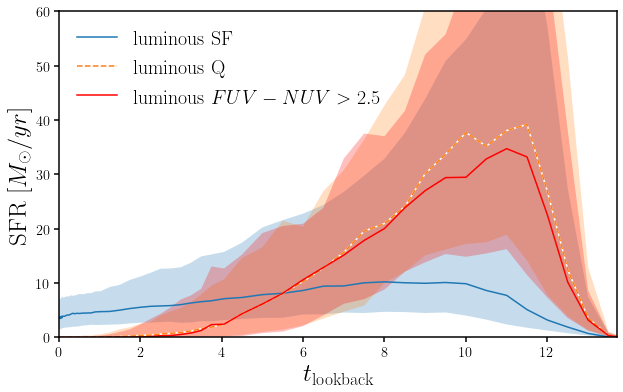

In [29]:
fig = plt.figure(figsize=(10,6))
sub = fig.add_subplot(111)

sub.fill_between(0.5 * (t_sfh_low + t_sfh_high), sfr_t_lum_sf_tng[0], sfr_t_lum_sf_tng[2], color='C0', linewidth=0, alpha=0.25)
sub.plot(0.5 * (t_sfh_low + t_sfh_high), sfr_t_lum_sf_tng[1], c='C0', label='luminous SF')

sub.fill_between(0.5 * (t_sfh_low + t_sfh_high), sfr_t_lum_q_cont_tng[0], sfr_t_lum_q_cont_tng[2], color='C1', linewidth=0, alpha=0.25)
sub.plot(0.5 * (t_sfh_low + t_sfh_high), sfr_t_lum_q_cont_tng[1], c='white', linestyle='-')
sub.plot(0.5 * (t_sfh_low + t_sfh_high), sfr_t_lum_q_cont_tng[1], c='C1', linestyle='--', label='luminous Q')

sub.fill_between(0.5 * (t_sfh_low + t_sfh_high), sfr_t_lum_uv_red_tng[0], sfr_t_lum_uv_red_tng[2], color='r', linewidth=0, alpha=0.25)
sub.plot(0.5 * (t_sfh_low + t_sfh_high), sfr_t_lum_uv_red_tng[1], c='r', label='luminous $FUV-NUV > 2.5$')
sub.legend(loc='upper left', fontsize=20)
sub.set_xlim(0, 13.7)
sub.set_xlabel(r'$t_{\rm lookback}$', fontsize=25)
sub.set_ylim(0., 60.)
sub.set_ylabel(r'SFR [$M_\odot/yr$]', fontsize=25)

Now we can answer the second question: 
2. Do the UV red/quiescent galaxies in SIMBA differ from the UV red/quiescent galaxies in TNG or EAGLE? 

**Yes.** In TNG, the UV red and quiescent galaxies do not have significiantly different SFHs, but in EAGLE they do.